# 1. Bibliothek laden

In [1]:
import pandas as pd
import plotly.graph_objects as go
import os
import numpy as np
from dash import Dash, dcc, html, Input, Output, callback
from dash import Dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib as mpl
import locale
import matplotlib.ticker as mticker
from datetime import datetime

# 2. Schneemenge laden & analysieren

In [2]:
data_snow = pd.read_table('Wetterdaten/Schneehöhe.txt', delimiter=";")
del data_snow["stn"]
data_snow.columns = data_snow.columns.str.replace('time', 'Datum')
data_snow.columns = data_snow.columns.str.replace('htoautd0', 'Schneemenge')

data_snow.head()

,Datum,Schneemenge
0,20211201,36
1,20211202,34
2,20211203,36
3,20211204,34
4,20211205,39


In [3]:
def convert_to_date(number):
    year = int(number / 10000)
    month = int((number % 10000) / 100)
    day = int(number % 100)

    date_obj = datetime(year, month, day)
    date_str = date_obj.strftime("%d.%m.%Y")

    return date_str

data_snow['Datum'] = data_snow['Datum'].apply(convert_to_date)

data_snow.head()

,Datum,Schneemenge
0,01.12.2021,36
1,02.12.2021,34
2,03.12.2021,36
3,04.12.2021,34
4,05.12.2021,39


In [4]:
data_snow.dtypes

Datum          object
Schneemenge     int64
dtype: object

In [40]:
number_measured_values = data_snow['Schneemenge'].value_counts()
print(number_measured_values)

0      224
38      12
23      10
8        9
9        8
      ... 
93       1
106      1
110      1
107      1
4        1
Name: Schneemenge, Length: 81, dtype: int64


In [44]:
fehlende_inputs = data_snow[data_snow['Schneemenge'] == '-'] #Fehlende Messwerte sind gekenntzeichnet mit '-'
print(fehlende_inputs)

Empty DataFrame
Columns: [Datum, Schneemenge]
Index: []


keine fehlenden Werte vorhanden

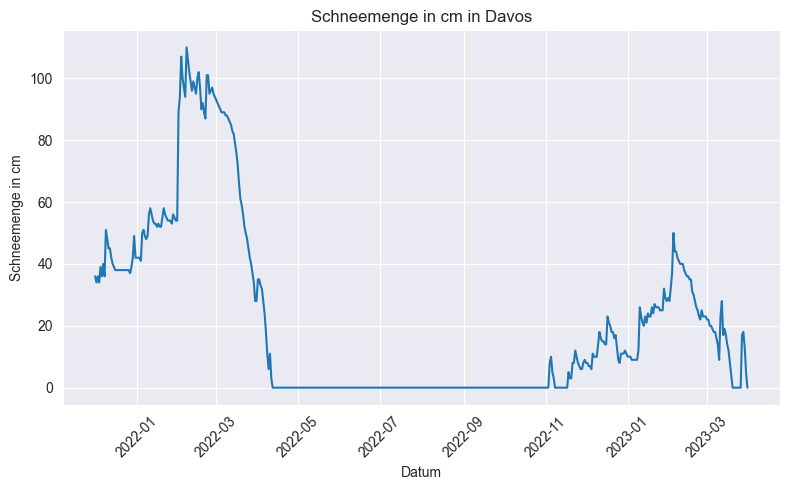

In [60]:
data_snow['Datum'] = pd.to_datetime(data_snow['Datum'], format='%d.%m.%Y')

#Sortieren
data_snow.sort_values(by='Datum', inplace=True)

#Diagramm erstellen
plt.figure(figsize=(8, 5))
plt.plot(data_snow['Datum'], data_snow['Schneemenge'])
plt.xlabel('Datum')
plt.ylabel('Schneemenge in cm')
plt.title('Schneemenge in cm in Davos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Sonnenstunden relativ laden & analysieren

In [47]:
data_sun_relativ = pd.read_table('Wetterdaten/Sonnenscheindauer_relativ.txt', delimiter=";")
del data_sun_relativ["stn"]
data_sun_relativ.columns = data_sun_relativ.columns.str.replace('time', 'Datum')
data_sun_relativ.columns = data_sun_relativ.columns.str.replace('sremaxdv', 'Sonnenstunden relativ')

data_sun_relativ.head()

,Datum,Sonnenstunden relativ
0,20211201,65
1,20211202,41
2,20211203,78
3,20211204,1
4,20211205,18


In [48]:
def convert_to_date(number):
    year = int(number / 10000)
    month = int((number % 10000) / 100)
    day = int(number % 100)

    date_obj = datetime(year, month, day)
    date_str = date_obj.strftime("%d.%m.%Y")

    return date_str

data_sun_relativ['Datum'] = data_sun_relativ['Datum'].apply(convert_to_date)

data_sun_relativ.head()

,Datum,Sonnenstunden relativ
0,01.12.2021,65
1,02.12.2021,41
2,03.12.2021,78
3,04.12.2021,1
4,05.12.2021,18


In [49]:
data_sun_relativ.dtypes

Datum                    object
Sonnenstunden relativ     int64
dtype: object

In [50]:
number_measured_values = data_sun_relativ['Sonnenstunden relativ'].value_counts()
print(number_measured_values)

100    67
0      49
99     31
13      9
96      9
       ..
49      1
10      1
72      1
67      1
54      1
Name: Sonnenstunden relativ, Length: 97, dtype: int64


In [52]:
fehlende_inputs = data_sun_relativ[data_sun_relativ['Sonnenstunden relativ'] == '-']  #Fehlende Messwerte sind gekenntzeichnet mit '-'
print(fehlende_inputs)

Empty DataFrame
Columns: [Datum, Sonnenstunden relativ]
Index: []


keine fehlenden Werte vorhanden

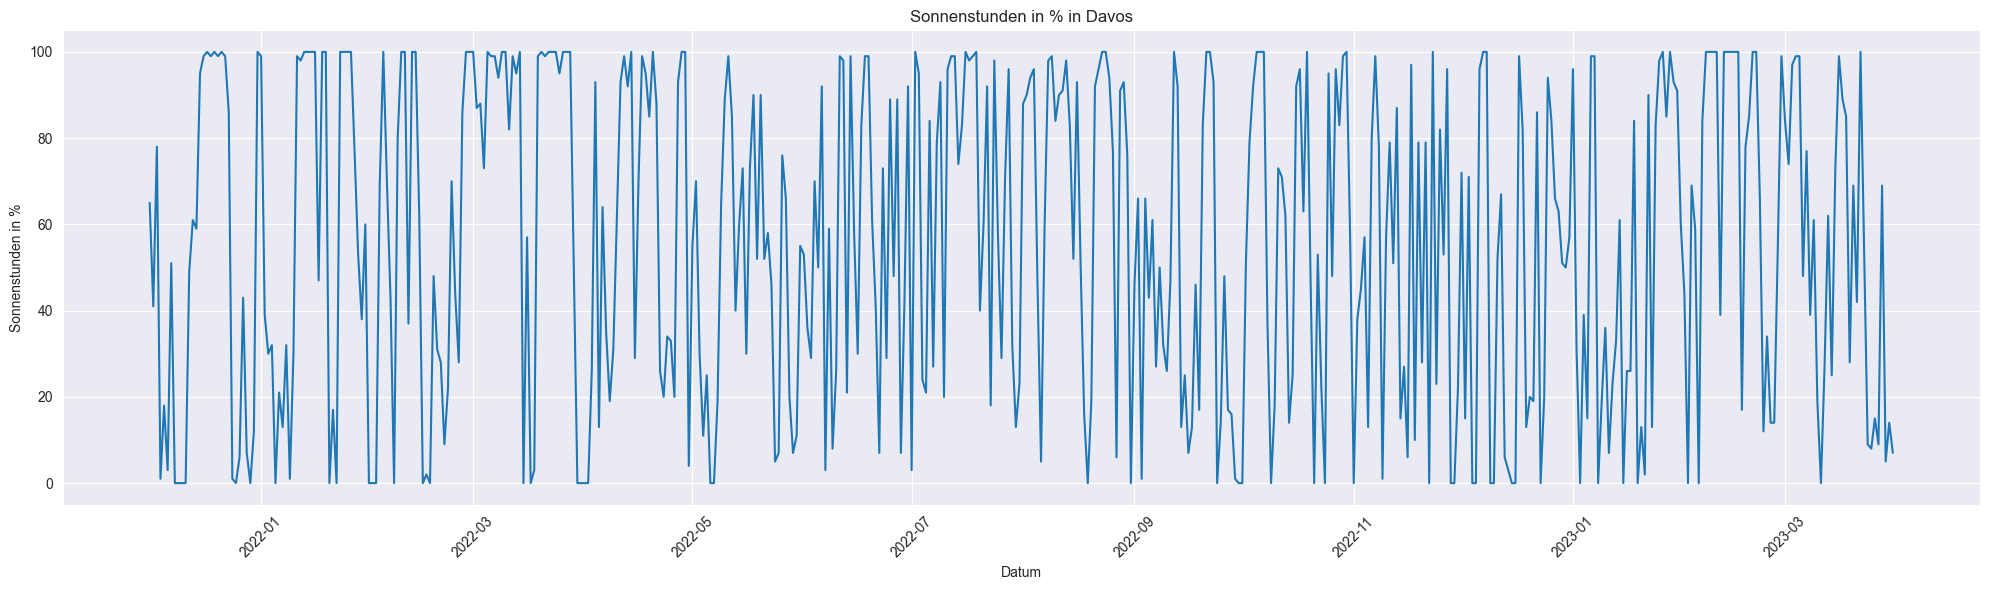

In [57]:
data_sun_relativ['Datum'] = pd.to_datetime(data_sun_relativ['Datum'], format='%d.%m.%Y')

#Sortieren
data_sun_relativ.sort_values(by='Datum', inplace=True)

#Diagramm erstellen
plt.figure(figsize=(20, 6))
plt.plot(data_sun_relativ['Datum'], data_sun_relativ['Sonnenstunden relativ'])
plt.xlabel('Datum')
plt.ylabel('Sonnenstunden in %')
plt.title('Sonnenstunden in % in Davos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Sonnenstunden absolut laden & analysieren

In [62]:
data_sun_absolut = pd.read_table('Wetterdaten/Sonnenscheindauer_absolut.txt', delimiter=";")
del data_sun_absolut["stn"]
data_sun_absolut.columns = data_sun_absolut.columns.str.replace('time', 'Datum')
data_sun_absolut.columns = data_sun_absolut.columns.str.replace('sre000d0', 'Sonnenstunden absolut')

data_sun_absolut.head()

,Datum,Sonnenstunden absolut
0,20211201,250
1,20211202,159
2,20211203,301
3,20211204,2
4,20211205,69


In [63]:
def convert_to_date(number):
    year = int(number / 10000)
    month = int((number % 10000) / 100)
    day = int(number % 100)

    date_obj = datetime(year, month, day)
    date_str = date_obj.strftime("%d.%m.%Y")

    return date_str

data_sun_absolut['Datum'] = data_sun_absolut['Datum'].apply(convert_to_date)

data_sun_absolut.head()

,Datum,Sonnenstunden absolut
0,01.12.2021,250
1,02.12.2021,159
2,03.12.2021,301
3,04.12.2021,2
4,05.12.2021,69


In [65]:
data_sun_absolut.dtypes

Datum                    object
Sonnenstunden absolut     int64
dtype: object

In [64]:
number_measured_values = data_sun_absolut['Sonnenstunden absolut'].value_counts()
print(number_measured_values)

0      43
373     4
3       4
24      4
372     4
       ..
695     1
586     1
697     1
698     1
43      1
Name: Sonnenstunden absolut, Length: 327, dtype: int64


In [66]:
fehlende_inputs = data_sun_absolut[data_sun_absolut['Sonnenstunden absolut'] == '-']  #Fehlende Messwerte sind gekenntzeichnet mit '-'
print(fehlende_inputs)

Empty DataFrame
Columns: [Datum, Sonnenstunden absolut]
Index: []


keine fehlenden Werte vorhanden

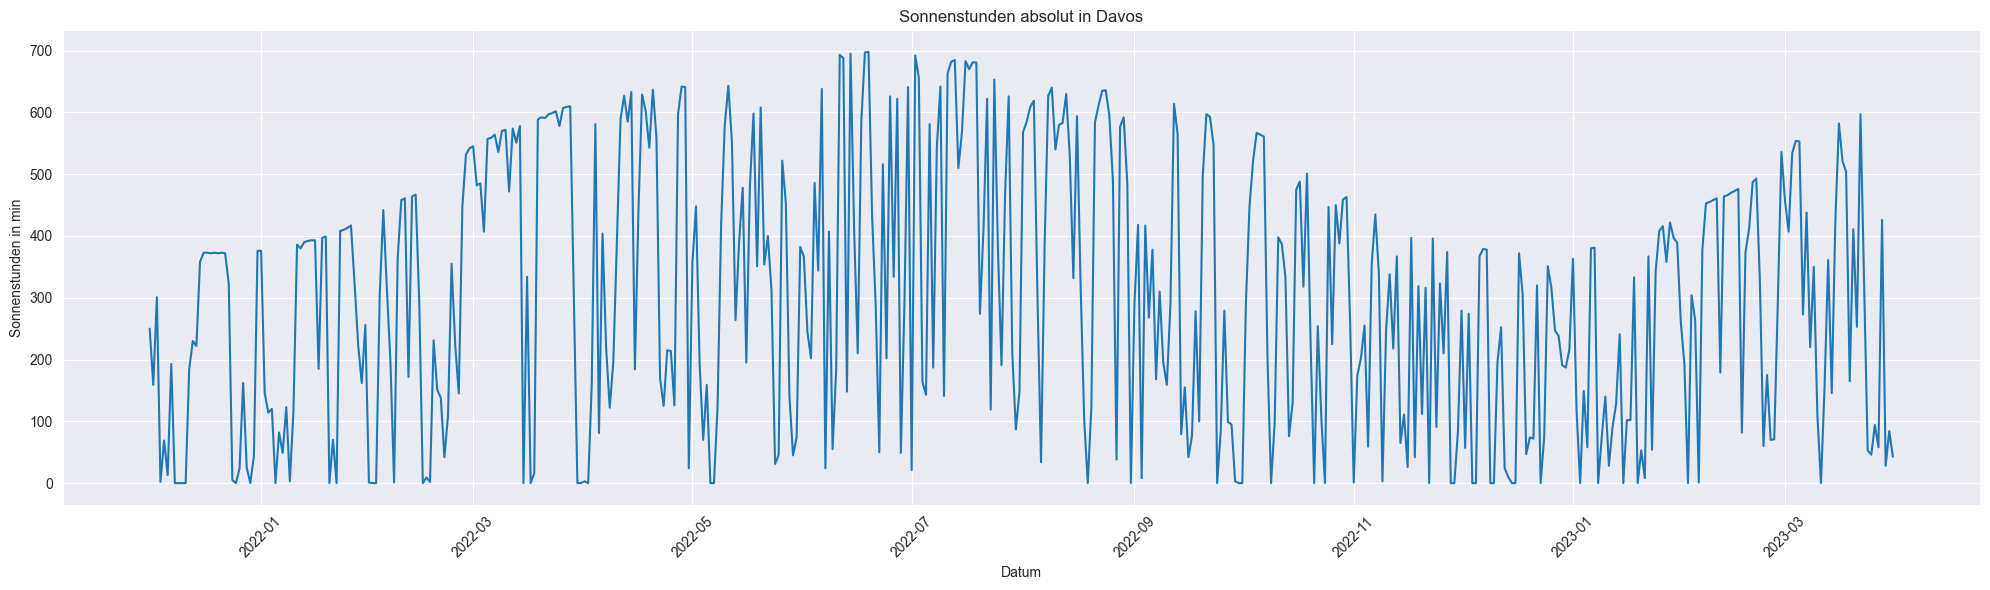

In [67]:
data_sun_absolut['Datum'] = pd.to_datetime(data_sun_absolut['Datum'], format='%d.%m.%Y')

#Sortieren
data_sun_absolut.sort_values(by='Datum', inplace=True)

#Diagramm erstellen
plt.figure(figsize=(20, 6))
plt.plot(data_sun_absolut['Datum'], data_sun_absolut['Sonnenstunden absolut'])
plt.xlabel('Datum')
plt.ylabel('Sonnenstunden in min')
plt.title('Sonnenstunden absolut in Davos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()